# 

In [ ]:
# import all lib for further used
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import to_categorical, np_utils
import tensorflow as tf
from keras.constraints import maxnorm
from keras.optimizers import SGD, adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D


In [2]:
# Load dataset 
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print('Loaded MNIST database with {} training and {} testing samples'.format(len(y_train), len(y_test)))

Loaded MNIST database with 60000 training and 10000 testing samples


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


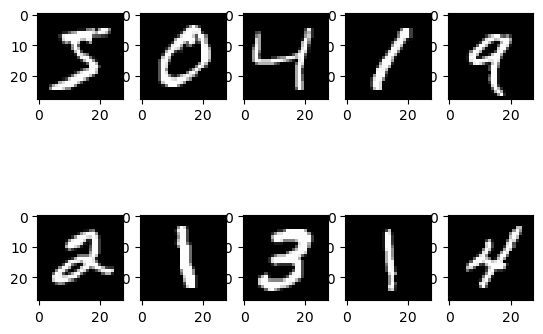

In [3]:
# check the shape of data
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

# plot first 10 images
for i in range(10):
 # define subplot
 plt.subplot(2, 5, 1+i)
 # plot raw pixel data
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [4]:
# preprocess data to 1 D and perform normalization
x_1 = x_train.reshape((x_train.shape[0], 28*28)).astype('float32')/255
x_2 = x_test.reshape((x_test.shape[0], 28*28)).astype('float32')/255

# Encode the output labels into one-hot coding
y_1 = to_categorical(y_train) #Converts a class vector (integers) to binary class matrix.
y_2= to_categorical(y_test)
num_classes = y_1.shape[1]

print('x shape:', x_1.shape, 'y shape:', y_1.shape, '# of Classes:', num_classes)


x shape: (60000, 784) y shape: (60000, 10) # of Classes: 10


In [6]:
# define a simple neural network model (1 hidden layer)

model = Sequential()
#model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32, input_dim = 28 * 28, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# After model construction, define loss function and gradience decent methods
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________




Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.7200 - accuracy: 0.8147 - val_loss: 0.3777 - val_accuracy: 0.8963
Epoch 2/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.3527 - accuracy: 0.9007 - val_loss: 0.3102 - val_accuracy: 0.9149
Epoch 3/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.3059 - accuracy: 0.9134 - val_loss: 0.2835 - val_accuracy: 0.9187
Epoch 4/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.2788 - accuracy: 0.9206 - val_loss: 0.2638 - val_accuracy: 0.9247
Epoch 5/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.2584 - accuracy: 0.9264 - val_loss: 0.2474 - val_accuracy: 0.9284
Epoch 6/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.2412 - accuracy: 0.9312 - val_loss: 0.2331 - val_accuracy: 0.9343
Epoch 7/100
60000/60000 [==============================] - 3

60000/60000 [==============================] - 2s 40us/step - loss: 0.0785 - accuracy: 0.9774 - val_loss: 0.1079 - val_accuracy: 0.9670
Epoch 54/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0776 - accuracy: 0.9771 - val_loss: 0.1062 - val_accuracy: 0.9688
Epoch 55/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.0767 - accuracy: 0.9782 - val_loss: 0.1059 - val_accuracy: 0.9685
Epoch 56/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0759 - accuracy: 0.9780 - val_loss: 0.1058 - val_accuracy: 0.9692
Epoch 57/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.0748 - accuracy: 0.9786 - val_loss: 0.1052 - val_accuracy: 0.9680
Epoch 58/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.0741 - accuracy: 0.9786 - val_loss: 0.1083 - val_accuracy: 0.9681
Epoch 59/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.0733 - accuracy: 0.9786 - val_loss: 

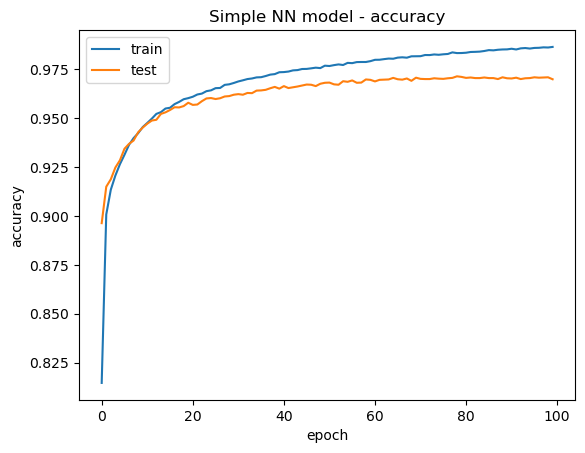

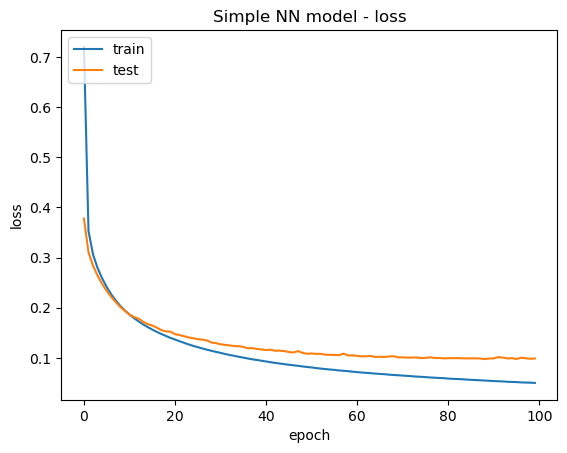

In [7]:
tf.set_random_seed(1)
np.random.seed(1)
epoch=100
# fit the simple NN model
history = model.fit(x_1, y_1, validation_data=(x_2, y_2), epochs=epoch)

# Convert the history.history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)
# Save the DataFrame to a CSV file
history_df.to_csv('training_dnn1.csv', index=False)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Simple NN model - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Simple NN model - loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
# Defind an Enhanced Simple neural network model

# add one more dense layer, change activation function, change optimizer
model = Sequential()
#model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, input_dim = 28 * 28, activation='sigmoid'))
model.add(Dense(64, input_dim = 28 * 28, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

# After model construction, define loss function and gradience decent methods
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 132us/step - loss: 0.4592 - accuracy: 0.8856 - val_loss: 0.2121 - val_accuracy: 0.9355
Epoch 2/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.1750 - accuracy: 0.9484 - val_loss: 0.1437 - val_accuracy: 0.9577
Epoch 3/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.1224 - accuracy: 0.9643 - val_loss: 0.1212 - val_accuracy: 0.9622
Epoch 4/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.0918 - accuracy: 0.9734 - val_loss: 0.0934 - val_accuracy: 0.9706
Epoch 5/100
60000/60000 [==============================] - 7s 115us/step - loss: 0.0699 - accuracy: 0.9794 - val_loss: 0.0872 - val_accuracy: 0.9730
Epoch 6/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.0559 - accuracy: 0.9834 - val_loss: 0.0812 - val_accuracy: 0.9741
Epoch 7/100
60000/60000 [==============================]

60000/60000 [==============================] - 7s 116us/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.1428 - val_accuracy: 0.9765
Epoch 56/100
60000/60000 [==============================] - 7s 112us/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1195 - val_accuracy: 0.9795
Epoch 57/100
60000/60000 [==============================] - 7s 118us/step - loss: 1.1102e-04 - accuracy: 1.0000 - val_loss: 0.1196 - val_accuracy: 0.9797
Epoch 58/100
60000/60000 [==============================] - 7s 111us/step - loss: 2.3413e-05 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9799
Epoch 59/100
60000/60000 [==============================] - 7s 114us/step - loss: 1.5265e-05 - accuracy: 1.0000 - val_loss: 0.1226 - val_accuracy: 0.9800
Epoch 60/100
60000/60000 [==============================] - 7s 121us/step - loss: 1.0671e-05 - accuracy: 1.0000 - val_loss: 0.1242 - val_accuracy: 0.9811
Epoch 61/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.0034 - accura

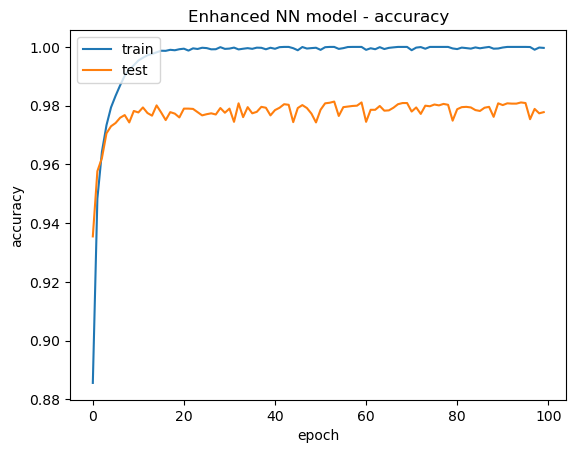

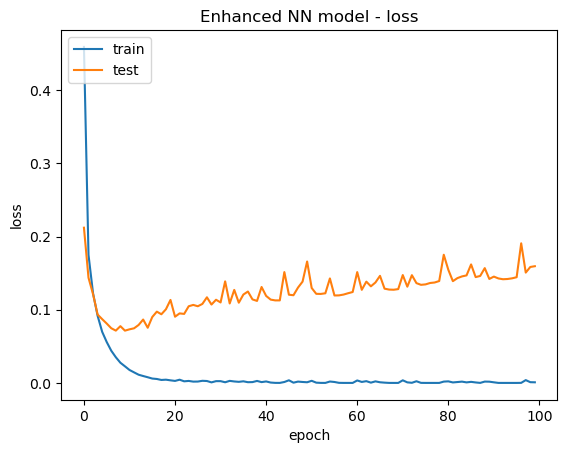

10000/10000 [==============================] - 0s 44us/step
Accuracy: 97.78%


In [9]:
tf.set_random_seed(2)
np.random.seed(2)
epoch = 100
# Fit Enhanced NN model
history = model.fit(x_1, y_1, validation_data=(x_2, y_2), epochs=epoch)
# Convert the history.history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)
# Save the DataFrame to a CSV file
history_df.to_csv('training_dnn1.csv', index=False)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Enhanced NN model - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Enhanced NN model - loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save_weights('dnn_model.h5')
# Final evaluation of the model
scores = model.evaluate(x_2, y_2)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [6]:
# preprocess x data into 2 dimensions to fit in Conv2D
x_c1 = x_train.reshape((x_train.shape[0], 28,28,1)).astype('float32')/255
x_c2 = x_test.reshape((x_test.shape[0], 28,28,1)).astype('float32')/255


In [11]:
# Build a simple CNN model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               80100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)              

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 37s 624us/step - loss: 0.3956 - accuracy: 0.8837 - val_loss: 0.1726 - val_accuracy: 0.9486
Epoch 2/80
60000/60000 [==============================] - 37s 618us/step - loss: 0.1561 - accuracy: 0.9538 - val_loss: 0.1167 - val_accuracy: 0.9626
Epoch 3/80
60000/60000 [==============================] - 37s 619us/step - loss: 0.1147 - accuracy: 0.9654 - val_loss: 0.1041 - val_accuracy: 0.9677
Epoch 4/80
60000/60000 [==============================] - 37s 618us/step - loss: 0.0938 - accuracy: 0.9716 - val_loss: 0.0805 - val_accuracy: 0.9754
Epoch 5/80
60000/60000 [==============================] - 37s 617us/step - loss: 0.0799 - accuracy: 0.9762 - val_loss: 0.0689 - val_accuracy: 0.9784
Epoch 6/80
60000/60000 [==============================] - 37s 616us/step - loss: 0.0699 - accuracy: 0.9795 - val_loss: 0.0641 - val_accuracy: 0.9794
Epoch 7/80
60000/60000 [==============================] 

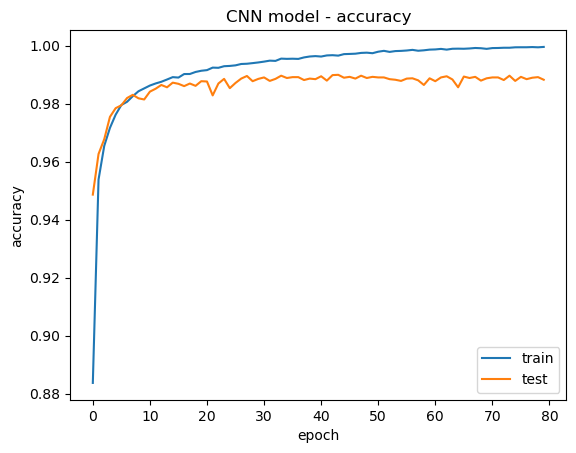

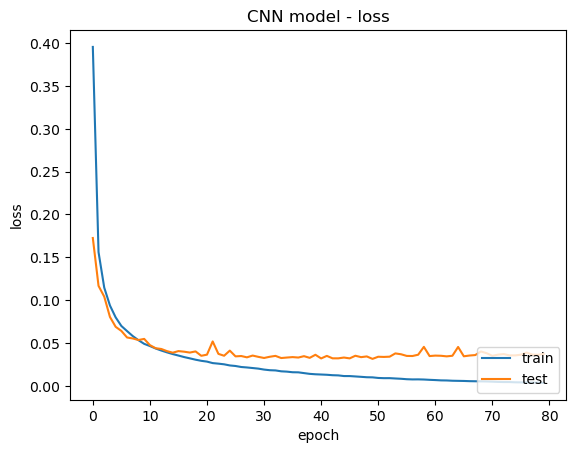

In [12]:
tf.set_random_seed(3)
np.random.seed(3)
epoch = 80
# Fit CNN model with batch size =64 
history = model.fit(x_c1, y_1, validation_data=(x_c2, y_2), epochs=epoch, batch_size=64)

# Convert the history.history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)
# Save the DataFrame to a CSV file
history_df.to_csv('training_cnn1.csv', index=False)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model - loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [13]:
# Build a more complicate CNN model
# change number of convolutional layers, the number of filters, activation functions  
model = Sequential()
model.add(Conv2D(32, (3, 3),  padding='same', activation='relu', kernel_constraint=maxnorm(3),input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid', kernel_constraint=maxnorm(3)))
model.add(Dense(64, activation='sigmoid', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)            

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 145s 2ms/step - loss: 2.3631 - accuracy: 0.0998 - val_loss: 2.2997 - val_accuracy: 0.1135
Epoch 2/80
60000/60000 [==============================] - 144s 2ms/step - loss: 2.3341 - accuracy: 0.1029 - val_loss: 2.2960 - val_accuracy: 0.1135
Epoch 3/80
60000/60000 [==============================] - 143s 2ms/step - loss: 2.2989 - accuracy: 0.1253 - val_loss: 2.2151 - val_accuracy: 0.4469
Epoch 4/80
60000/60000 [==============================] - 145s 2ms/step - loss: 1.6733 - accuracy: 0.5307 - val_loss: 1.1271 - val_accuracy: 0.8101
Epoch 5/80
60000/60000 [==============================] - 144s 2ms/step - loss: 0.9646 - accuracy: 0.7787 - val_loss: 0.7003 - val_accuracy: 0.8715
Epoch 6/80
60000/60000 [==============================] - 146s 2ms/step - loss: 0.6979 - accuracy: 0.8356 - val_loss: 0.5108 - val_accuracy: 0.8922
Epoch 7/80
60000/60000 [==============================] - 145s

Epoch 56/80
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0331 - accuracy: 0.9920 - val_loss: 0.0370 - val_accuracy: 0.9888
Epoch 57/80
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0321 - accuracy: 0.9924 - val_loss: 0.0365 - val_accuracy: 0.9883
Epoch 58/80
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0311 - accuracy: 0.9922 - val_loss: 0.0364 - val_accuracy: 0.9886
Epoch 59/80
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0298 - accuracy: 0.9932 - val_loss: 0.0365 - val_accuracy: 0.9886
Epoch 60/80
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0290 - accuracy: 0.9929 - val_loss: 0.0354 - val_accuracy: 0.9898
Epoch 61/80
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0286 - accuracy: 0.9934 - val_loss: 0.0353 - val_accuracy: 0.9894
Epoch 62/80
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0274 - accuracy: 0.9933

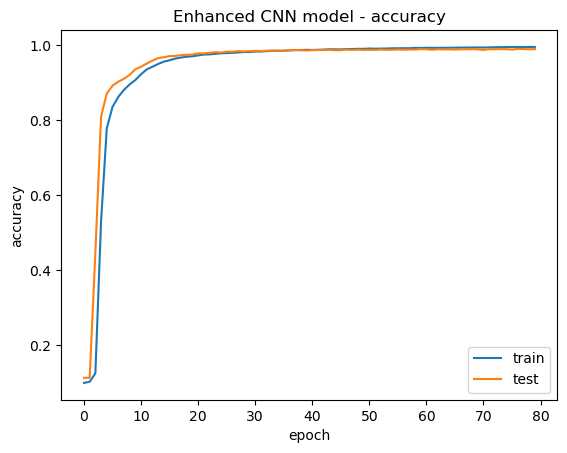

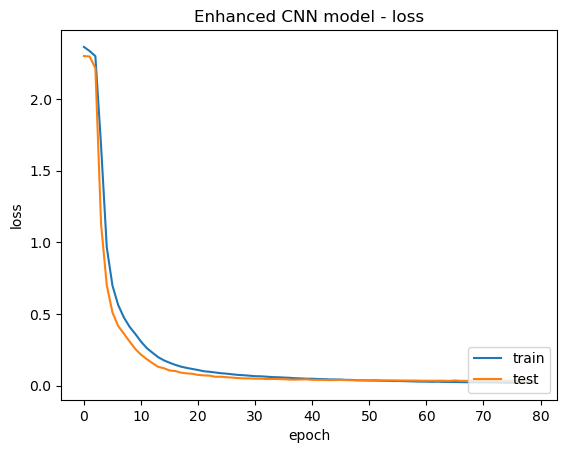

10000/10000 [==============================] - 11s 1ms/step
Accuracy: 98.99%


In [14]:
tf.set_random_seed(4)
np.random.seed(4)

epoch = 80

# Fit a Complex CNN model, batch size = 64
history = model.fit(x_c1, y_1, validation_data=(x_c2, y_2), epochs=epoch, batch_size=64)

# Convert the history.history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)
# Save the DataFrame to a CSV file
history_df.to_csv('training_cnn2.csv', index=False)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Enhanced CNN model - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Enhanced CNN model - loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

model.save_weights('cnn2_model.h5')
# Final evaluation of the model
scores = model.evaluate(x_c2, y_2)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [8]:
# Build a complicate CNN model with Modified SGD (change of learning rate and Momentum)
model = Sequential()
model.add(Conv2D(32, (3, 3),  padding='same', activation='relu', kernel_constraint=maxnorm(3),input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid', kernel_constraint=maxnorm(3)))
model.add(Dense(64, activation='sigmoid', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
# Change learning rate from 0.01 to 0.005, momentum from 0 to 0.5
lrate = 0.005
decay = lrate/80
sgd = SGD(lr=lrate, momentum=0.5, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 207
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
average_pooling2d_2 (Average (None, 7, 7, 64)          0         
________________________

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 228s 4ms/step - loss: 2.3787 - accuracy: 0.1038 - val_loss: 2.2978 - val_accuracy: 0.1135
Epoch 2/80
60000/60000 [==============================] - 225s 4ms/step - loss: 2.3323 - accuracy: 0.1080 - val_loss: 2.2600 - val_accuracy: 0.2042
Epoch 3/80
60000/60000 [==============================] - 227s 4ms/step - loss: 1.8749 - accuracy: 0.4143 - val_loss: 1.3011 - val_accuracy: 0.7714
Epoch 4/80
60000/60000 [==============================] - 231s 4ms/step - loss: 1.1215 - accuracy: 0.7346 - val_loss: 0.8359 - val_accuracy: 0.8548
Epoch 5/80
60000/60000 [==============================] - 224s 4ms/step - loss: 0.8118 - accuracy: 0.8115 - val_loss: 0.6228 - val_accuracy: 0.8808
Epoch 6/80
60000/60000 [==============================] - 231s 4ms/step - loss: 0.6573 - accuracy: 0.8456 - val_loss: 0.5070 - val_accuracy: 0.8959
Epoch 7/80
60000/60000 [==============================] - 232s

Epoch 56/80
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0749 - accuracy: 0.9822 - val_loss: 0.0575 - val_accuracy: 0.9830
Epoch 57/80
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0741 - accuracy: 0.9823 - val_loss: 0.0583 - val_accuracy: 0.9827
Epoch 58/80
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0732 - accuracy: 0.9819 - val_loss: 0.0582 - val_accuracy: 0.9826
Epoch 59/80
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0716 - accuracy: 0.9829 - val_loss: 0.0585 - val_accuracy: 0.9813
Epoch 60/80
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0730 - accuracy: 0.9829 - val_loss: 0.0564 - val_accuracy: 0.9823
Epoch 61/80
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0701 - accuracy: 0.9830 - val_loss: 0.0554 - val_accuracy: 0.9830
Epoch 62/80
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0683 - accuracy: 0.9839

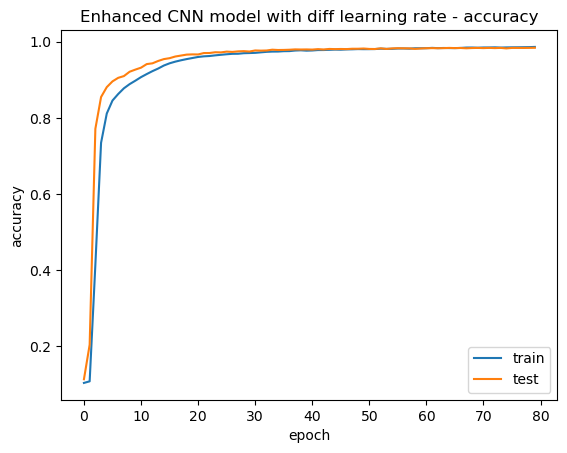

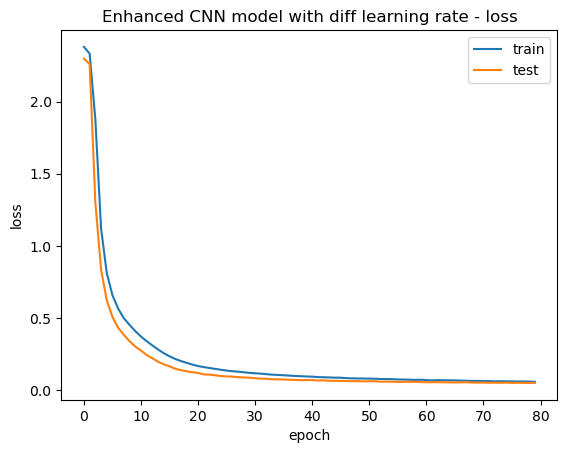

10000/10000 [==============================] - 7s 691us/step
Accuracy: 98.41%


In [9]:
tf.set_random_seed(5)
np.random.seed(5)

epoch = 80

# Fit CNN with SGD, changed learning rate model 
history = model.fit(x_c1, y_1, validation_data=(x_c2, y_2), epochs=epoch,batch_size=64)

# Convert the history.history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)
# Save the DataFrame to a CSV file
history_df.to_csv('training_cnn3_opt.csv', index=False)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Enhanced CNN model with diff learning rate - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Enhanced CNN model with diff learning rate - loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

model.save_weights('cnn_lr_model.h5')
# Final evaluation of the Enhanced CNN model with different learning rate
scores = model.evaluate(x_c2, y_2)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [11]:
# Build a more complicate CNN model with rmsprop optimizer 
model = Sequential()
model.add(Conv2D(32, (3, 3),  padding='same', activation='relu', kernel_constraint=maxnorm(3),input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid', kernel_constraint=maxnorm(3)))
model.add(Dense(64, activation='sigmoid', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


# Compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 222
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
average_pooling2d_4 (Average (None, 7, 7, 64)          0         
________________________

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2705 - accuracy: 0.9389 - val_loss: 0.0444 - val_accuracy: 0.9873
Epoch 2/80
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0612 - accuracy: 0.9837 - val_loss: 0.0771 - val_accuracy: 0.9767
Epoch 3/80
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0469 - accuracy: 0.9872 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 4/80
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0386 - accuracy: 0.9895 - val_loss: 0.0266 - val_accuracy: 0.9920
Epoch 5/80
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0325 - accuracy: 0.9911 - val_loss: 0.0412 - val_accuracy: 0.9880
Epoch 6/80
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0289 - accuracy: 0.9920 - val_loss: 0.0260 - val_accuracy: 0.9917
Epoch 7/80
60000/60000 [==============================] - 110s

Epoch 56/80
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0620 - val_accuracy: 0.9925
Epoch 57/80
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0610 - val_accuracy: 0.9930
Epoch 58/80
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0591 - val_accuracy: 0.9935
Epoch 59/80
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0620 - val_accuracy: 0.9930
Epoch 60/80
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0620 - val_accuracy: 0.9936
Epoch 61/80
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0698 - val_accuracy: 0.9925
Epoch 62/80
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0016 - accuracy: 0.9995

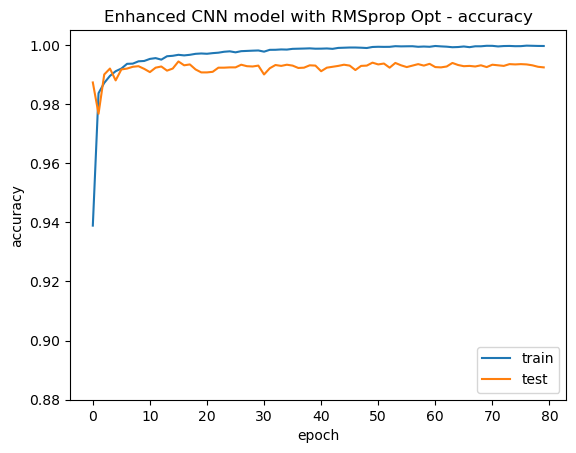

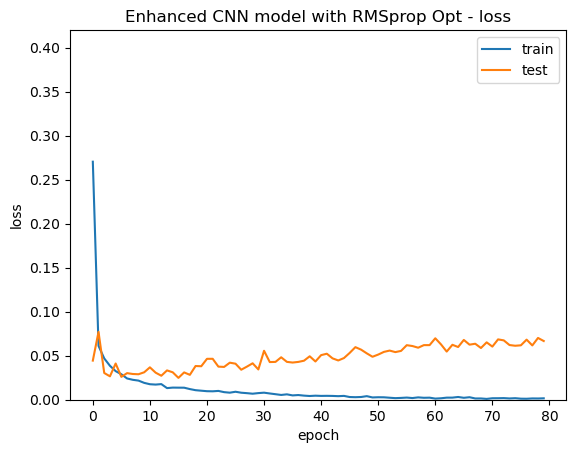

10000/10000 [==============================] - 9s 938us/step
Accuracy: 99.24%


In [12]:
tf.set_random_seed(6)
np.random.seed(6)

epoch = 80

# Fit CNN with rmsprop optimizer model 
history = model.fit(x_c1, y_1, validation_data=(x_c2, y_2), epochs=epoch, batch_size=64)

# Convert the history.history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)
# Save the DataFrame to a CSV file
history_df.to_csv('training_cnn4_rms.csv', index=False)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Enhanced CNN model with RMSprop Opt - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
# Set minimum value and major unit of the y-axis
plt.gca().set_ylim([0.88,1.005])  
plt.gca().set_yticks(np.arange(0.88, 1.00+0.01, 0.02))
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Enhanced CNN model with RMSprop Opt - loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# Set minimum value and major unit of the y-axis
plt.gca().set_ylim([0.00,0.42])  
plt.gca().set_yticks(np.arange(0.00, 0.40 + 0.05, 0.05)) 
plt.show()
model.save_weights('cnn_adam_model_rms.h5')
# Final evaluation of the model
scores = model.evaluate(x_c2, y_2)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [17]:
# Build a complicate CNN model with Adam optimizer 
model = Sequential()
model.add(Conv2D(32, (3, 3),  padding='same', activation='relu', kernel_constraint=maxnorm(3),input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid', kernel_constraint=maxnorm(3)))
model.add(Dense(64, activation='sigmoid', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
average_pooling2d_3 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)             

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 151s 3ms/step - loss: 0.3576 - accuracy: 0.9185 - val_loss: 0.0559 - val_accuracy: 0.9847
Epoch 2/80
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0635 - accuracy: 0.9844 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 3/80
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0425 - accuracy: 0.9887 - val_loss: 0.0274 - val_accuracy: 0.9908
Epoch 4/80
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0304 - accuracy: 0.9918 - val_loss: 0.0280 - val_accuracy: 0.9910
Epoch 5/80
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0244 - accuracy: 0.9933 - val_loss: 0.0214 - val_accuracy: 0.9938
Epoch 6/80
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.0255 - val_accuracy: 0.9919
Epoch 7/80
60000/60000 [==============================] - 150s

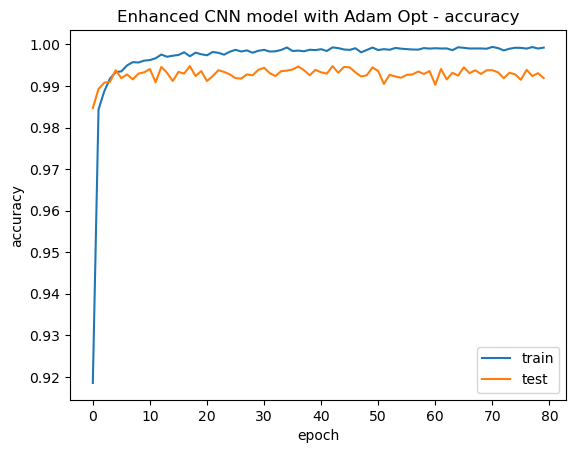

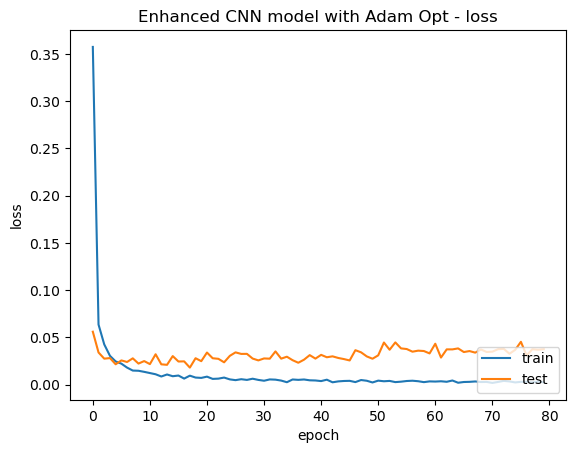

In [18]:
tf.set_random_seed(7)
np.random.seed(7)

epoch = 100

# Fit CNN with Adam optimizer model 
history = model.fit(x_c1, y_1, validation_data=(x_c2, y_2), epochs=epoch, batch_size=64)

# Convert the history.history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)
# Save the DataFrame to a CSV file
history_df.to_csv('training_cnn4.csv', index=False)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Enhanced CNN model with Adam Opt - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Enhanced CNN model with Adam Opt - loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 104s 2ms/step - loss: 0.3542 - accuracy: 0.9189 - val_loss: 0.0507 - val_accuracy: 0.9873
Epoch 2/50
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0630 - accuracy: 0.9847 - val_loss: 0.0362 - val_accuracy: 0.9894
Epoch 3/50
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0420 - accuracy: 0.9889 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 4/50
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0313 - accuracy: 0.9913 - val_loss: 0.0291 - val_accuracy: 0.9906
Epoch 5/50
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0237 - accuracy: 0.9932 - val_loss: 0.0346 - val_accuracy: 0.9905
Epoch 6/50
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0222 - accuracy: 0.9938 - val_loss: 0.0272 - val_accuracy: 0.9919
Epoch 7/50
60000/60000 [==============================] - 110s

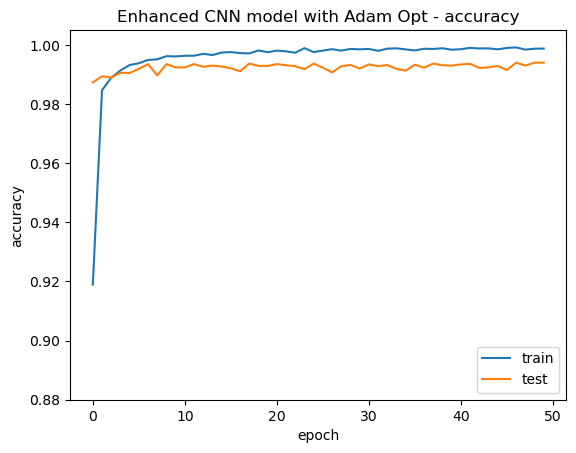

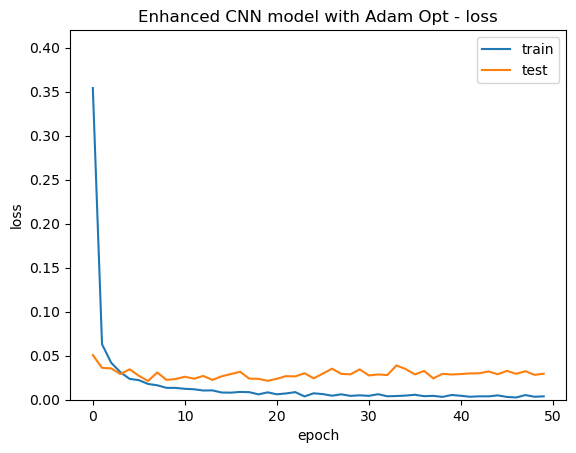

10000/10000 [==============================] - 9s 876us/step
Accuracy: 99.40%


In [14]:
tf.set_random_seed(7)
np.random.seed(7)

epoch = 50

# Fit CNN with adam optimizer model (50 epoch) 
history = model.fit(x_c1, y_1, validation_data=(x_c2, y_2), epochs=epoch, batch_size=64)

# Convert the history.history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)
# Save the DataFrame to a CSV file
history_df.to_csv('training_cnn4_adam_22.csv', index=False)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Enhanced CNN model with Adam Opt - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
# Set minimum value and major unit of the y-axis
plt.gca().set_ylim([0.88,1.005])  
plt.gca().set_yticks(np.arange(0.88, 1.00+0.01, 0.02))
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Enhanced CNN model with Adam Opt - loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# Set minimum value and major unit of the y-axis
plt.gca().set_ylim([0.00,0.42])  
plt.gca().set_yticks(np.arange(0.00, 0.40 + 0.05, 0.05)) 
plt.show()
model.save_weights('cnn_adam_model_adam.h5')
# Final evaluation of the model
scores = model.evaluate(x_c2, y_2)
print("Accuracy: %.2f%%" % (scores[1]*100))